Machine Learning model for recognizing digits from the MNIST dataset

In [1]:
!pip install torch matplotlib torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim

# Check if CUDA is available
if torch.cuda.is_available():
    print(f"CUDA is available! Device: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. Check runtime settings.")

CUDA is available! Device: Tesla T4


In [12]:
# Define transformations for the training and test sets
transform = transforms.Compose(
    [transforms.ToTensor(), # converts a PIL image to a tensor and transforms the values {0,...255} --> [0, 1]
     transforms.Normalize(0.5, 0.5)]) # first tuple -> means, second tuple -> std's. output=(input-mean)/std
# The image has three color channels (RGB) and therefore the tuples have three elements, one for each color

# Batch sizez
train_batch_size = 8
test_batch_size = 4

# Download and load the training data
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size,
                                          shuffle=True, num_workers=2)

# Download and load the test data
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size,
                                         shuffle=False, num_workers=2)

# Define class names
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')


# Assuming 'net' is your model and 'inputs', 'labels' are your data
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

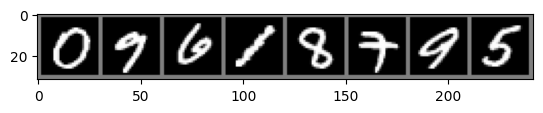

0 9 6 1 8 7 9 5


In [13]:
# Functions to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize - [-1,1] --> [0,1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# images, labels = images.to(device), labels.to(device)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(train_batch_size)))

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x

net = Net()

# Assuming 'net' is your model and 'inputs', 'labels' are your data
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move model to the device (GPU or CPU)
net.to(device)

# Example of moving tensors to GPU
# inputs, labels = inputs.to(device), labels.to(device)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [7]:
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(5):  # example with 5 epochs

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1, 2000] loss: 0.705
[1, 4000] loss: 0.329
[1, 6000] loss: 0.262
[2, 2000] loss: 0.198
[2, 4000] loss: 0.177
[2, 6000] loss: 0.159
[3, 2000] loss: 0.134
[3, 4000] loss: 0.123
[3, 6000] loss: 0.119
[4, 2000] loss: 0.096
[4, 4000] loss: 0.094
[4, 6000] loss: 0.094
[5, 2000] loss: 0.085
[5, 4000] loss: 0.072
[5, 6000] loss: 0.075
Finished Training


In [9]:
correct = 0
total = 0

# We do not need to track gradients for evaluation
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)

        # Forward pass
        outputs = net(images)

        # Get the predicted class with the highest score
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print accuracy
print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f} %')


Accuracy of the network on the 10000 test images: 97.26 %


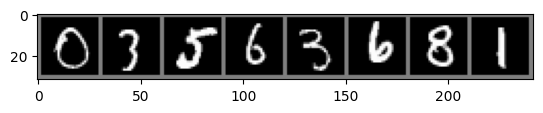

GroundTruth:  0 3 5 6 3 6 8 1
Predicted:    0 3 5 6 3 6 8 1


In [16]:
images, labels = next(dataiter)

# Move the inputs and labels to the GPU
images, labels = images.to(device), labels.to(device)

# Print images
imshow(torchvision.utils.make_grid(images.cpu()))  # Move images back to CPU for visualization
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(train_batch_size)))

# Get predictions from the model
outputs = net(images)

# Get the predicted class with the highest score
_, predicted = torch.max(outputs, 1)

print('Predicted:   ', ' '.join(f'{classes[predicted[j]]}' for j in range(train_batch_size)))